In [61]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
tf.config.experimental.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU')]

In [5]:
tf.test.is_built_with_gpu_support()

False

In [6]:
tf.test.is_built_with_cuda

<function tensorflow.python.platform.test.is_built_with_cuda()>

In [7]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [28]:
X_train[0][27]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [21]:
X_train[1][0]

array([  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
        54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [29]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [30]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [32]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [37]:
def plot_design(index):
    plt.figure(figsize=(30,1))
    plt.imshow(X_train[index])           

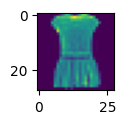

In [40]:
plot_design(3)

In [43]:
classes[y_train[1]]

'T-shirt/top'

In [45]:
X_train_scaled =  X_train/255
X_test_scaled = X_test/255

In [46]:
X_train_scaled.shape

(60000, 28, 28)

In [47]:
X_test_scaled.shape

(10000, 28, 28)

In [54]:
y_train[7]

np.uint8(2)

In [55]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_train_categorical[7]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)
y_test_categorical[7]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    # keras.layers.Dense(3000,activation="relu")
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer="SGD",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])


model.fit(X_train_scaled,y_train_categorical,epochs=5) 

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6645 - loss: 1.0856
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8031 - loss: 0.6069
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8185 - loss: 0.5542
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8280 - loss: 0.5107
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8331 - loss: 0.5056


In [60]:
model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step


array([[2.04836521e-02, 1.79150198e-02, 1.13726571e-01, ...,
        9.92592692e-01, 9.01977003e-01, 9.96646225e-01],
       [7.79859245e-01, 7.34398365e-02, 9.99611914e-01, ...,
        2.25527925e-04, 5.30495882e-01, 1.51501112e-02],
       [9.11175966e-01, 9.99986291e-01, 6.60150170e-01, ...,
        3.65507640e-02, 7.39402771e-02, 1.02195265e-02],
       ...,
       [8.98936033e-01, 1.27707478e-02, 2.68129528e-01, ...,
        9.86326411e-02, 9.86695230e-01, 6.91032559e-02],
       [4.49659020e-01, 9.99565423e-01, 4.90660131e-01, ...,
        8.85378122e-02, 3.26650217e-02, 2.09115967e-01],
       [6.29719123e-02, 1.06581025e-01, 2.54433781e-01, ...,
        9.46019292e-01, 7.89452672e-01, 7.60696948e-01]], dtype=float32)

In [63]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step


np.int64(9)

In [68]:
classes[np.argmax(model.predict(X_test_scaled)[8])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step


'Sandal'

In [75]:
classes[y_test[4]]

'Shirt'

In [76]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.8312 - loss: 0.5095


[0.518580436706543, 0.8253999948501587]

In [83]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),
            keras.layers.Dense(3000, activation="relu"),
            keras.layers.Dense(1000, activation="relu"),
            keras.layers.Dense(1000, activation="relu"),
            keras.layers.Dense(1000, activation="relu"),
            keras.layers.Dense(1000, activation="relu"),
            keras.layers.Dense(10, activation="sigmoid")
    ])

    model.compile(optimizer="SGD",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [84]:
%%timeit -n1 -r1
with tf.device("/CPU:0"):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled,y_train_categorical,epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.6780 - loss: 0.9965
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8432 - loss: 0.4440
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.8607 - loss: 0.3896
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8719 - loss: 0.3530
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8815 - loss: 0.3253
2min 48s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
